## City Crime Prediction Using Clustering and Classification Techniques

Implement crime prediction final project for CS591-k1

In [1]:
import json
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

import statsmodels.formula.api as smf
import pandas
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
from sklearn.cluster import KMeans
import pandas as pd

import seaborn as sns
%matplotlib inline


In [4]:
import json
from pprint import pprint

with open('boston-rows.json') as data_file:    
    bostonjson = json.load(data_file)

print len(bostonjson['data'])

columnlist = []
for col in bostonjson['meta']['view']['columns']:
    columnlist.append(col['name'])

    

268056


In [5]:
import json
from pprint import pprint

with open('la-rows.json') as data_file:    
    lajson = json.load(data_file)

print len(lajson['data'])

lacolumnlist = []
for col in lajson['meta']['view']['columns']:
    lacolumnlist.append(col['name'])


243750


    Row format= 0:sequence number, 8:id, 10: type, 12:district, 13:area, 14:date, 15:weapon type, 19:year, 20:month, 21:day of week, 26:lat,long

In [6]:
print bostonjson['data'][0][0], bostonjson['data'][0][8], bostonjson['data'][0][10], bostonjson['data'][0][12], 
print bostonjson['data'][0][13], bostonjson['data'][0][14], bostonjson['data'][0][15], bostonjson['data'][0][19], 
print bostonjson['data'][0][20], bostonjson['data'][0][21], bostonjson['data'][0][27],

1 120420285 RESIDENTIAL BURGLARY D4 629 2012-07-08T06:00:00 Other 2012 7 Sunday [None, u'42.34638135', u'-71.10379454', None, False]


In [11]:
print lajson['data'][0][0], lajson['data'][0][8], lajson['data'][0][10], lajson['data'][0][12], 
print lajson['data'][0][13], lajson['data'][0][14], lajson['data'][0][15], lajson['data'][0][19], 
#print lajson['data'][0][20], lajson['data'][0][21], lajson['data'][0][27],

 583917 2014-09-14T00:00:00 2014-09-14T00:00:00 12 77th Street 1205 888  5000      S  NORMANDIE                    AV


In [24]:
print lajson['data'][191][8]

2014-09-14T00:00:00


In [12]:
bostondf = pd.DataFrame(bostonjson['data'])
bostondf.columns = columnlist
print columnlist
print bostondf.head()[['INCIDENT_TYPE_DESCRIPTION','FROMDATE','Location']]

[u'sid', u'id', u'position', u'created_at', u'created_meta', u'updated_at', u'updated_meta', u'meta', u'COMPNOS', u'NatureCode', u'INCIDENT_TYPE_DESCRIPTION', u'MAIN_CRIMECODE', u'REPTDISTRICT', u'REPORTINGAREA', u'FROMDATE', u'WEAPONTYPE', u'Shooting', u'DOMESTIC', u'SHIFT', u'Year', u'Month', u'DAY_WEEK', u'UCRPART', u'X', u'Y', u'STREETNAME', u'XSTREETNAME', u'Location']
  INCIDENT_TYPE_DESCRIPTION             FROMDATE  \
0      RESIDENTIAL BURGLARY  2012-07-08T06:00:00   
1        AGGRAVATED ASSAULT  2012-07-08T06:03:00   
2                   ROBBERY  2012-07-08T06:26:00   
3       COMMERCIAL BURGLARY  2012-07-08T06:56:00   
4                   ROBBERY  2012-07-08T07:15:00   

                                         Location  
0  [None, 42.34638135, -71.10379454, None, False]  
1  [None, 42.31684135, -71.07458456, None, False]  
2  [None, 42.34284135, -71.09698955, None, False]  
3   [None, 42.3164411, -71.06582908, None, False]  
4  [None, 42.27051636, -71.11989955, None, False] 

In [25]:
ladf = pd.DataFrame(lajson['data'])
ladf.columns = lacolumnlist
print lacolumnlist


print ladf.head()[['Crm Cd Desc','sid','Date Rptd']]

[u'sid', u'id', u'position', u'created_at', u'created_meta', u'updated_at', u'updated_meta', u'meta', u'Date Rptd', u'DR NO', u'DATE OCC', u'TIME OCC', u'AREA', u'AREA NAME', u'RD', u'Crm Cd', u'Crm Cd Desc', u'Status', u'Status Desc', u'LOCATION', u'Cross Street', u'Location 1']
                             Crm Cd Desc     sid            Date Rptd
0                            TRESPASSING  583917  2014-09-14T00:00:00
1                            TRESPASSING  583918  2014-09-14T00:00:00
2  SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT  583919  2014-09-14T00:00:00
3                        BRANDISH WEAPON  583920  2014-09-14T00:00:00
4                      THEFT OF IDENTITY  590386  2014-02-28T00:00:00


In [47]:
print bostondf['Location'][0][1]
latlist = map(lambda k: k[1], bostondf['Location'])
longlist = map(lambda k: k[2], bostondf['Location'])

typelist = map(lambda k: k, bostondf['INCIDENT_TYPE_DESCRIPTION'])
hourlist = map(lambda k: k.split("T")[1].split(":")[0], bostondf['FROMDATE'])
daylist = map(lambda k: k, bostondf['DAY_WEEK'])
yearlist = map(lambda k: k, bostondf['Year'])
monthlist = map(lambda k: k, bostondf['Month'])

print len(latlist), len(longlist), len(hourlist), len(yearlist)

42.34638135
268056 268056 268056 268056


In [26]:
latypelist = map(lambda k: k, ladf['Crm Cd Desc'])
laidlist=map(lambda k: k, ladf['sid'])
ladatelist=map(lambda k: k, ladf['Date Rptd'])
print len(latypelist), len(laidlist), len(ladatelist)

243750 243750 243750


In [52]:
layearlist=[]

for i in ladatelist:
    layearlist.append(i[:4])

print len(layearlist)    

lamonthlist=[]

for i in ladatelist:
    lamonthlist.append(i[5:-12])

print len(layearlist) 

243750
243750


In [54]:
lacrimedata={"Year":layearlist,"Crime_Type":latypelist,"Month":lamonthlist}

In [55]:
lacrimedf=pd.DataFrame(lacrimedata)
print lacrimedf.head()
print lacrimedf.Year.unique()


                              Crime_Type Month  Year
0                            TRESPASSING    09  2014
1                            TRESPASSING    09  2014
2  SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT    09  2014
3                        BRANDISH WEAPON    09  2014
4                      THEFT OF IDENTITY    02  2014
[u'2014']


In [56]:
bostoncrimedata={"Year":yearlist ,"Month":monthlist,"Crime_Type":typelist}

In [57]:
bostoncrimedf=pd.DataFrame(bostoncrimedata)
print bostoncrimedf.head()
print bostoncrimedf.Year.unique()

             Crime_Type Month  Year
0  RESIDENTIAL BURGLARY     7  2012
1    AGGRAVATED ASSAULT     7  2012
2               ROBBERY     7  2012
3   COMMERCIAL BURGLARY     7  2012
4               ROBBERY     7  2012
[u'2012' u'2013' u'2014' u'2015']


In [58]:
bostoncrimedf=bostoncrimedf.loc[bostoncrimedf['Year'] ==('2014')]

In [59]:
print len(lacrimedf)
print len(bostoncrimedf)

243750
88058


In [64]:
print bostoncrimedf.head()

           Crime_Type Month  Year
130238     AUTO THEFT     1  2014
130239       PropLost     1  2014
130240         InvPer     1  2014
130241  OTHER LARCENY     1  2014
130242       PropLost     1  2014


In [65]:
del bostoncrimedf['Year']
del lacrimedf['Year']

In [66]:
print bostoncrimedf.head()

           Crime_Type Month
130238     AUTO THEFT     1
130239       PropLost     1
130240         InvPer     1
130241  OTHER LARCENY     1
130242       PropLost     1


In [67]:
lamonth= lacrimedf .groupby(['Month'])
bostonmonth= bostoncrimedf .groupby(['Month'])

In [83]:
mlist=[]
tlist=[]

In [84]:
for a,b in lamonth:
    mlist.append(a)
    tlist.append(b['Crime_Type'].count())
    


In [85]:
print len(mlist), len(tlist)

12 12


In [109]:
lmdata={"Month":mlist,"LA_Number_of_Crimes":tlist}
lmdf=pd.DataFrame(lmdata)
print lmdf

    LA_Number_of_Crimes Month
0                 19169    01
1                 17384    02
2                 19730    03
3                 19413    04
4                 20645    05
5                 20494    06
6                 21480    07
7                 21280    08
8                 21287    09
9                 21669    10
10                19844    11
11                21355    12


In [102]:
bmlist=[]
btlist=[]

In [103]:
for a,b in bostonmonth:
    bmlist.append(a)
    btlist.append(b['Crime_Type'].count())

In [106]:
bmolist=[]

for i in bmlist:
    if i not in ('10','11','12'):
        bmolist.append("0"+i)
    else:
        bmolist.append(i)


In [110]:
bmdata={"Month":bmolist,"Boston_Number_of_Crimes":btlist}
bmdf=pd.DataFrame(bmdata)
print bmdf

    Boston_Number_of_Crimes Month
0                      7112    01
1                      7863    10
2                      6757    11
3                      6723    12
4                      6118    02
5                      7175    03
6                      7136    04
7                      8222    05
8                      7794    06
9                      7766    07
10                     7746    08
11                     7646    09


In [115]:
monthdf = pd.merge(lmdf,bmdf, on='Month', how='outer')


In [123]:
print monthdf

    LA_Number_of_Crimes Month  Boston_Number_of_Crimes
0                 19169    01                     7112
1                 17384    02                     6118
2                 19730    03                     7175
3                 19413    04                     7136
4                 20645    05                     8222
5                 20494    06                     7794
6                 21480    07                     7766
7                 21280    08                     7746
8                 21287    09                     7646
9                 21669    10                     7863
10                19844    11                     6757
11                21355    12                     6723


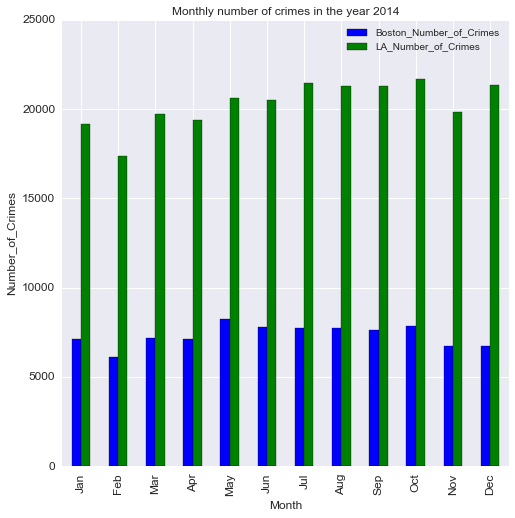

In [203]:
import matplotlib.pyplot as plt
ax = monthdf[['Boston_Number_of_Crimes','LA_Number_of_Crimes']].plot(kind='bar', title ="Monthly number of crimes in the year 2014",figsize=(8,8),legend=True, fontsize=12)
ax.set_xlabel("Month",fontsize=12)
ax.set_ylabel("Number_of_Crimes",fontsize=12)

plt.xticks(range(12),['Jan', 'Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.show()

In [151]:
print lacrimedf.Crime_Type.unique()

[u'TRESPASSING' u'SPOUSAL(COHAB) ABUSE - SIMPLE ASSAULT' u'BRANDISH WEAPON'
 u'THEFT OF IDENTITY' u'SEX, UNLAWFUL' u'ROBBERY'
 u'BATTERY - SIMPLE ASSAULT' u'VANDALISM - MISDEAMEANOR ($399 OR UNDER)'
 u'THEFT PLAIN - PETTY ($950 & UNDER)' u'TRAFFIC DR #' u'VEHICLE - STOLEN'
 u'BIKE - STOLEN' u'CRIMINAL THREATS - NO WEAPON DISPLAYED'
 u'THEFT-GRAND ($950.01 & OVER)EXCPT,GUNS,FOWL,LIVESTK,PROD'
 u'DOCUMENT FORGERY / STOLEN FELONY' u'LETTERS, LEWD'
 u'THEFT FROM MOTOR VEHICLE - GRAND ($400 AND OVER)' u'BURGLARY'
 u'ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT' u'ATTEMPTED ROBBERY'
 u'VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)'
 u'BATTERY WITH SEXUAL CONTACT' u'VIOLATION OF RESTRAINING ORDER'
 u'BATTERY POLICE' u'BURGLARY FROM VEHICLE'
 u'BURGLARY FROM VEHICLE, ATTEMPTED' u'BURGLARY, ATTEMPTED'
 u'SPOUSAL (COHAB) ABUSE - AGGRAVATED ASSAULT'
 u'SHOPLIFTING - PETTY THEFT ($950 & UNDER)'
 u'THEFT FROM MOTOR VEHICLE - PETTY ($950.01 & OVER)'
 u'VIOLATION OF COURT ORDER' u'OTHER M

In [163]:
print bostoncrimedf.head(n=50)

                        Crime_Type Month
130238                  AUTO THEFT     1
130239                    PropLost     1
130240                      InvPer     1
130241               OTHER LARCENY     1
130242                    PropLost     1
130243                    PropLost     1
130244              SIMPLE ASSAULT     1
130245                         VAL     1
130246                  PhoneCalls     1
130247                      InvPer     1
130248                    PropLost     1
130249                    PropLost     1
130250                      InvPer     1
130251               OTHER LARCENY     1
130252                    PersMiss     1
130253              SIMPLE ASSAULT     1
130254              WEAPONS CHARGE     1
130255                   VANDALISM     1
130256                     InvProp     1
130257                  PhoneCalls     1
130258               OTHER LARCENY     1
130259               OTHER LARCENY     1
130260                     LICViol     1
130261          

In [142]:
theftlist=[]
assaultlist=[]

In [143]:
for index, row in lacrimedf.iterrows():
    if 'THEFT' in row['Crime_Type']:
        theftlist.append(1)
    else:
        theftlist.append(0)
    if 'ASSAULT' in row['Crime_Type']:
        assaultlist.append(1)
    else:
        assaultlist.append(0)

In [144]:
lactdata={"Theft":theftlist,"Assault":assaultlist}
lactdf=pd.DataFrame(lactdata)
print lactdf.head(n=20)

    Assault  Theft
0         0      0
1         0      0
2         1      0
3         0      0
4         0      1
5         0      0
6         0      1
7         0      0
8         1      0
9         0      0
10        0      1
11        0      0
12        0      0
13        0      0
14        1      0
15        0      0
16        1      0
17        0      0
18        1      0
19        0      0


In [147]:
LA_Assault=lactdf['Assault'].sum()
LA_Theft=lactdf['Theft'].sum()

In [148]:
print LA_Assault, LA_Theft

40634 55817


In [180]:
btheftlist=[]
bassaultlist=[]

In [181]:
for index, row in bostoncrimedf.iterrows():
    if 'theft'in row['Crime_Type'].lower():
        btheftlist.append(1)
    else:
        btheftlist.append(0)
    if 'assault'in row['Crime_Type'].lower():
        bassaultlist.append(1)
    else:
        bassaultlist.append(0)

In [182]:
boctdata={"Theft":btheftlist,"Assault":bassaultlist}
boctdf=pd.DataFrame(boctdata)
print boctdf.head(n=20)

    Assault  Theft
0         0      1
1         0      0
2         0      0
3         0      0
4         0      0
5         0      0
6         1      0
7         0      0
8         0      0
9         0      0
10        0      0
11        0      0
12        0      0
13        0      0
14        0      0
15        1      0
16        0      0
17        0      0
18        0      0
19        0      0


In [183]:
BOSTON_Assault=boctdf['Assault'].sum()
BOSTON_Theft=boctdf['Theft'].sum()

In [184]:
print BOSTON_Assault, BOSTON_Theft

7946 1603


In [196]:
bclist=[]
lclist=[]
clist=[]

In [197]:
bclist.append(BOSTON_Assault)
lclist.append(LA_Assault)
bclist.append(BOSTON_Theft)
lclist.append(LA_Theft)
clist.append('Assalult')
clist.append('Theft')

In [198]:
tcdata={"Crime_Type":clist,"Boston":bclist,"LA":lclist}
tcdf=pd.DataFrame(tcdata)
print tcdf

   Boston Crime_Type     LA
0    7946   Assalult  40634
1    1603      Theft  55817


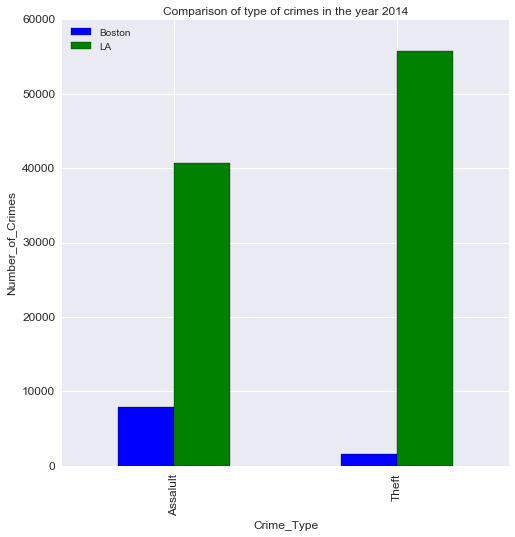

In [204]:
import matplotlib.pyplot as plt
ax = tcdf[['Boston','LA']].plot(kind='bar', title ="Comparison of type of crimes in the year 2014",figsize=(8,8),legend=True, fontsize=12)
ax.set_xlabel("Crime_Type",fontsize=12)
ax.set_ylabel("Number_of_Crimes",fontsize=12)

plt.xticks(range(2),['Assalult', 'Theft'])
plt.show()